In [1]:
import glob
import numpy as np
import os.path as path
from scipy import misc
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


In [2]:
dirs=os.listdir("Damaged")
dirs1=os.listdir("Normal")
m=["Damaged/","Normal/"]
k=["Ap_Pedicle.png","Ap_Spinous_Process.png","Ap_Vertebra.png"]
s=["Lat_Anterior_Vertebral_Line.png","Lat_Disk_Height.png","Lat_Posterior_Vertebral_Line.png","Lat_Spinous_Process.png","Lat_Vertebra.png"]
labels = []
masks_list =[]
for file in dirs1:
    for i in k:
         masks=Image.open( "Normal/"+ file + "/AP/" + i)
         output=0.0
         im = masks.resize((64,64))
         width, height = im.size 
         masks_list.append(np.array(im))
         labels.append(output)
for file in dirs1:
    for i in s:
        masks=Image.open( "Normal/"+ file + "/LAT/" + i)
        output=0.0
        im = masks.resize((64,64))
        width, height = im.size 
        masks_list.append(np.array(im))
        labels.append(output)
for file in dirs:
    for i in s:
        masks=Image.open( "Damaged/"+ file + "/LAT/" + i)
        im = masks.resize((64,64))
        output=1.0
        width, height = im.size 
        masks_list.append(np.array(im)) 
        labels.append(output)
for file in dirs:
    for i in k:
        masks=Image.open( "Damaged/"+ file + "/AP/" + i)
        im = masks.resize((64,64))
        output=1.0
        width, height = im.size 
        masks_list.append(np.array(im))
        labels.append(output)
masks_np = np.asarray(masks_list)
labels_np=np.asarray(labels)
print(labels_np.shape,masks_np.shape)

(5008,) (5008, 64, 64)


In [3]:
y = np.asarray(labels_np)
y=y.reshape(y.shape[0],1)
#x = np.asarray(masks_np, dtype=np.float32)
x = masks_np.reshape(masks_np.shape[0], masks_np.shape[1], masks_np.shape[2],1)
x=x/255
print(x.shape,y.shape)
from keras.utils import to_categorical
y1=to_categorical(y)

(5008, 64, 64, 1) (5008, 1)


In [7]:
img_height,img_width = 64,64 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,1))

In [8]:
z = base_model.output
z = GlobalAveragePooling2D()(z)
z = Dropout(0.7)(z) 
predictions = Dense(num_classes, activation= 'softmax')(z)
model = Model(inputs = base_model.input, outputs = predictions)

W0223 00:50:29.648647  5680 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [9]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:

hist=model.fit(x, y1, epochs = 5, batch_size = 128, validation_split=0.2)

Train on 4006 samples, validate on 1002 samples
Epoch 1/5
4006/4006 [==============================] - 1009s 252ms/step - loss: 1.2875 - acc: 0.6041 - val_loss: 1.7070 - val_acc: 0.2914
Epoch 2/5
4006/4006 [==============================] - 2445s 610ms/step - loss: 1.1019 - acc: 0.6538 - val_loss: 2.1317 - val_acc: 0.2804
Epoch 3/5
4006/4006 [==============================] - 911s 227ms/step - loss: 0.9307 - acc: 0.7054 - val_loss: 2.2614 - val_acc: 0.3054
Epoch 4/5
4006/4006 [==============================] - 7775s 2s/step - loss: 0.7431 - acc: 0.7474 - val_loss: 4.6550 - val_acc: 0.1357
Epoch 5/5
4006/4006 [==============================] - 2958s 738ms/step - loss: 0.6965 - acc: 0.7668 - val_loss: 2.2376 - val_acc: 0.4301


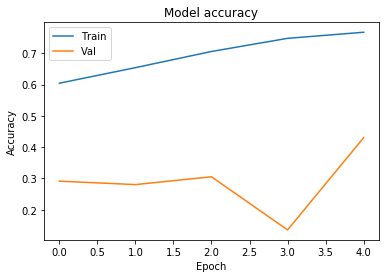

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

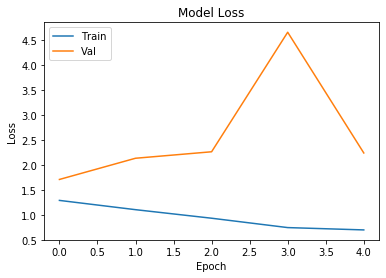

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [16]:
model.save('my_model.h5')